In [341]:
#Importar librerías

import warnings
warnings.filterwarnings('ignore')

import regex as re

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

In [342]:
#Importa csv
df=pd.read_csv('data/train.csv')

In [343]:
#Printea sample de DataFrame
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


In [344]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 780.0 KB


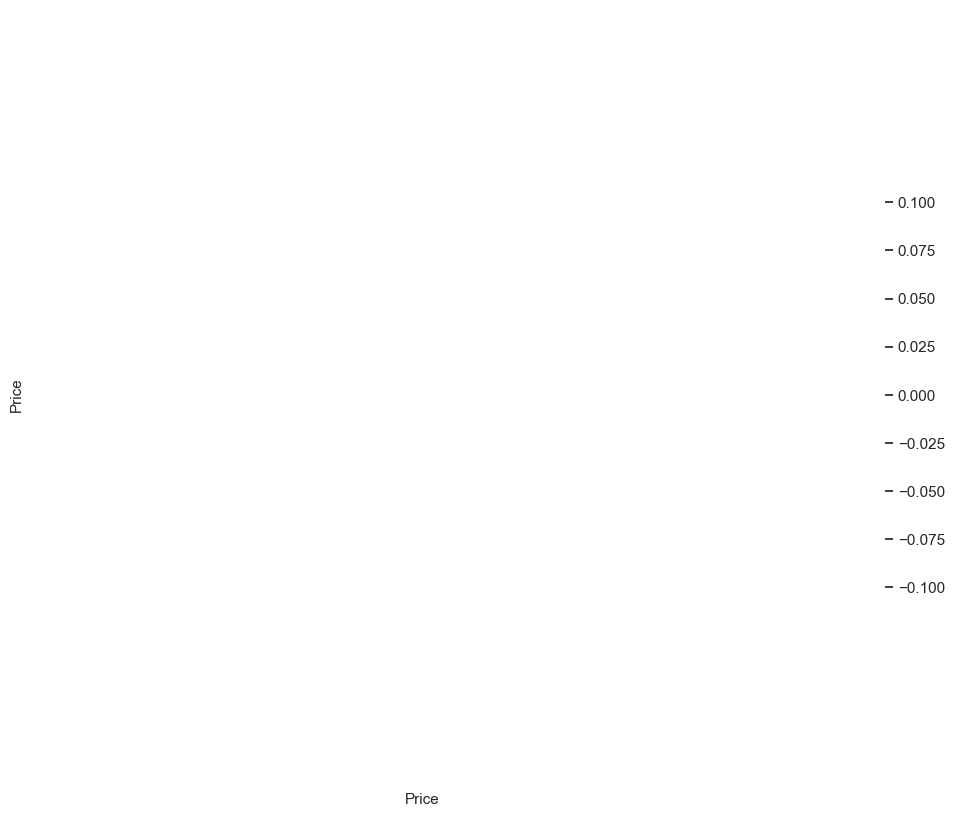

In [345]:
#Analiza colinealidad o si es posible analizar debido al gran número de columnas categóricas

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap='rainbow',
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [346]:
#Quita KG
df['Weight'] = df['Weight'].str.replace('kg', '')

#Convierte la columna a ordinal
df['Weight'] = pd.to_numeric(df['Weight'])

df['Weight'].sample(20)


373    2.60
372    3.25
203    3.20
940    2.75
508    1.34
314    1.10
552    4.42
327    1.70
975    2.04
713    1.50
102    2.20
408    2.20
200    2.65
86     1.83
451    2.17
585    4.50
899    1.90
185    2.77
781    4.30
208    1.20
Name: Weight, dtype: float64

In [347]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), object(11)
memory usage: 728.1 KB


In [348]:
#Renombrar columna
df.rename(columns={' Storage': 'Storage'}, inplace=True)

In [349]:
# Extrace valores numericos. Valor bajo = SSD, medio = Hybrid, alto = HDD.
df['Storage'] = df['Storage'].str.extract('(\d+)').astype(int)

df['Storage']

0      128
1      128
2      256
3      512
4      256
      ... 
972    256
973    256
974    256
975    128
976    508
Name: Storage, Length: 977, dtype: int32

In [350]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), int32(1), object(10)
memory usage: 667.1 KB


In [351]:
# Extrace valores numericos de RAM. Capacidad en GB.
df['RAM'] = df['RAM'].str.extract('(\d+)').astype(int)

df['RAM']

0       8
1       8
2       8
3      16
4       8
       ..
972    32
973     8
974    16
975     8
976     4
Name: RAM, Length: 977, dtype: int32

In [352]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), int32(2), object(9)
memory usage: 613.5 KB


In [353]:
df.GPU.value_counts()

Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: GPU, Length: 98, dtype: int64

In [354]:
df['GPU'] = df['GPU'].str.split().str[0]

df['GPU']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
972    Nvidia
973     Intel
974    Nvidia
975    Nvidia
976     Intel
Name: GPU, Length: 977, dtype: object

In [355]:
df.CPU.value_counts()

Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64

In [356]:
df['CPU'] = df['CPU'].str.split(' ', 3).str[:3].str.join(' ')

df['CPU'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P'], dtype=object)

In [357]:
procesador = set(df['CPU'])
len(procesador)

36

In [358]:
#Dejar solo valor numérico en Screen Size
df['Screen Size'] = df['Screen Size'].str.replace('"', '').astype(float)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(3), int32(2), object(8)
memory usage: 534.7 KB


In [359]:
df['Screen Size'].value_counts()

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: Screen Size, dtype: int64

In [360]:
df['Screen'] = df['Screen'].str.rsplit(' ', 1).str[-1]
df.Screen.value_counts()


1920x1080    655
1366x768     206
3840x2160     36
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: Screen, dtype: int64

In [361]:
#Separar valores para multiplicar después.
df[['Width', 'Height']] = df['Screen'].str.extract(r'(\d+)x(\d+)', expand=True)
#Pasar a ordinal
df['Width'] = pd.to_numeric(df['Width'])
df['Height'] = pd.to_numeric(df['Height'])
#Pasar Screen a ordinal con total de pixeles
df['Screen'] = df['Width'] * df['Height']
df.drop(['Width', 'Height'], axis=1, inplace=True)
df.Screen.value_counts()


2073600    655
1049088    206
8294400     36
1440000     19
5760000     15
3686400     15
4096000      6
3393024      6
1296000      4
5184000      4
3317760      3
3840000      3
2304000      2
3110400      2
4990464      1
Name: Screen, dtype: int64

In [362]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5,8,128,Intel,macOS,NaN,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5,8,128,Intel,macOS,NaN,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,2073600,Intel Core i5,8,256,Intel,No OS,NaN,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7,16,512,AMD,macOS,NaN,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5,8,256,Intel,macOS,NaN,1.37,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,2073600,Intel Core i7,32,256,Nvidia,Windows,10,4.42,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,2073600,Intel Core i5,8,256,Intel,Windows,10,1.95,10492560.00
974,Asus,Rog Strix,Gaming,17.3,2073600,Intel Core i7,16,256,Nvidia,Windows,10,2.73,18227710.80
975,HP,Probook 450,Notebook,15.6,2073600,Intel Core i5,8,128,Nvidia,Windows,10,2.04,8705268.00


In [363]:
#Creo Labels en nuevo dataframe para testear después colinealidad
df_labels=df
df_labels['GPU'] = df_labels['GPU'].astype('category').cat.codes
df_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    int64  
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    int8   
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(3), int32(2), int64(1), int8(1), object(6)
memory usag

In [364]:
#Creo Labels en nuevo dataframe para testear después colinealidad
df_labels=df
df_labels['CPU'] = df_labels['CPU'].astype('category').cat.codes
df_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    int64  
 5   CPU                       977 non-null    int8   
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    int8   
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(3), int32(2), int64(1), int8(2), object(5)
memory usag